In [4]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
train_data = pd.read_csv(r"C:\Users\USER\Downloads\Train (1).csv")

In [6]:
train_data.head()

,id,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,days_since_prev_campaign_contact,num_contacts_prev_campaign,prev_campaign_outcome,term_deposit_subscribed
0,id_43823,28.0,management,single,tertiary,no,285.0,yes,no,unknown,26,jun,303.0,4.0,NaN,0,unknown,0
1,id_32289,34.0,blue-collar,married,secondary,no,934.0,no,yes,cellular,18,nov,143.0,2.0,132.0,1,other,0
2,id_10523,46.0,technician,married,secondary,no,656.0,no,no,cellular,5,feb,101.0,4.0,NaN,0,unknown,0
3,id_43951,34.0,services,single,secondary,no,2.0,yes,no,unknown,20,may,127.0,3.0,NaN,0,unknown,0
4,id_40992,41.0,blue-collar,married,primary,no,1352.0,yes,no,cellular,13,may,49.0,2.0,NaN,0,unknown,0


In [7]:
train_data.shape

(31647, 18)

In [8]:
train_data.describe()

,customer_age,balance,day_of_month,last_contact_duration,num_contacts_in_campaign,days_since_prev_campaign_contact,num_contacts_prev_campaign,term_deposit_subscribed
count,31028.000000,31248.000000,31647.000000,31336.000000,31535.000000,5816.000000,31647.000000,31647.000000
mean,40.439216,1368.112615,15.818561,256.184038,2.776629,224.995186,0.591620,0.107246
std,10.751392,3085.342417,8.322970,256.181479,3.153293,114.991828,2.499675,0.309430
min,18.000000,-8020.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,32.000000,72.000000,8.000000,103.000000,1.000000,133.000000,0.000000,0.000000
50%,39.000000,449.000000,16.000000,179.000000,2.000000,195.000000,0.000000,0.000000
75%,48.000000,1413.000000,21.000000,315.250000,3.000000,329.000000,0.000000,0.000000
max,97.000000,102128.000000,31.000000,4900.000000,63.000000,871.000000,275.000000,1.000000


In [9]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                31647 non-null  object 
 1   customer_age                      31028 non-null  float64
 2   job_type                          31647 non-null  object 
 3   marital                           31497 non-null  object 
 4   education                         31647 non-null  object 
 5   default                           31647 non-null  object 
 6   balance                           31248 non-null  float64
 7   housing_loan                      31647 non-null  object 
 8   personal_loan                     31498 non-null  object 
 9   communication_type                31647 non-null  object 
 10  day_of_month                      31647 non-null  int64  
 11  month                             31647 non-null  object 
 12  last

In [10]:
print(train_data.isnull().sum())

id                                      0
customer_age                          619
job_type                                0
marital                               150
education                               0
default                                 0
balance                               399
housing_loan                            0
personal_loan                         149
communication_type                      0
day_of_month                            0
month                                   0
last_contact_duration                 311
num_contacts_in_campaign              112
days_since_prev_campaign_contact    25831
num_contacts_prev_campaign              0
prev_campaign_outcome                   0
term_deposit_subscribed                 0
dtype: int64


In [11]:
train_data.dropna(axis=0, inplace=True)

In [12]:
print(train_data.isnull().sum())

id                                  0
customer_age                        0
job_type                            0
marital                             0
education                           0
default                             0
balance                             0
housing_loan                        0
personal_loan                       0
communication_type                  0
day_of_month                        0
month                               0
last_contact_duration               0
num_contacts_in_campaign            0
days_since_prev_campaign_contact    0
num_contacts_prev_campaign          0
prev_campaign_outcome               0
term_deposit_subscribed             0
dtype: int64


In [13]:
train_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
customer_age,5495.0,40.307916,11.438977,18.0,32.0,38.0,47.0,93.0
balance,5495.0,1545.015833,3031.040619,-1880.0,163.0,587.0,1729.0,81208.0
day_of_month,5495.0,14.242948,7.880070,1.0,7.0,14.0,19.0,31.0
last_contact_duration,5495.0,260.094449,235.103773,0.0,114.0,195.0,325.0,2237.0
num_contacts_in_campaign,5495.0,2.044040,1.544000,1.0,1.0,2.0,2.0,16.0
days_since_prev_campaign_contact,5495.0,225.406733,115.218527,1.0,133.0,195.0,329.0,871.0
num_contacts_prev_campaign,5495.0,3.217652,5.137067,1.0,1.0,2.0,4.0,275.0
term_deposit_subscribed,5495.0,0.223840,0.416854,0.0,0.0,0.0,0.0,1.0


In [14]:
test_data = pd.read_csv(r"C:\Users\USER\Downloads\Train (1).csv")

In [15]:
test_data.head()

,id,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,days_since_prev_campaign_contact,num_contacts_prev_campaign,prev_campaign_outcome,term_deposit_subscribed
0,id_43823,28.0,management,single,tertiary,no,285.0,yes,no,unknown,26,jun,303.0,4.0,NaN,0,unknown,0
1,id_32289,34.0,blue-collar,married,secondary,no,934.0,no,yes,cellular,18,nov,143.0,2.0,132.0,1,other,0
2,id_10523,46.0,technician,married,secondary,no,656.0,no,no,cellular,5,feb,101.0,4.0,NaN,0,unknown,0
3,id_43951,34.0,services,single,secondary,no,2.0,yes,no,unknown,20,may,127.0,3.0,NaN,0,unknown,0
4,id_40992,41.0,blue-collar,married,primary,no,1352.0,yes,no,cellular,13,may,49.0,2.0,NaN,0,unknown,0


In [16]:
test_data.shape

(31647, 18)

In [17]:
test_data.describe()

,customer_age,balance,day_of_month,last_contact_duration,num_contacts_in_campaign,days_since_prev_campaign_contact,num_contacts_prev_campaign,term_deposit_subscribed
count,31028.000000,31248.000000,31647.000000,31336.000000,31535.000000,5816.000000,31647.000000,31647.000000
mean,40.439216,1368.112615,15.818561,256.184038,2.776629,224.995186,0.591620,0.107246
std,10.751392,3085.342417,8.322970,256.181479,3.153293,114.991828,2.499675,0.309430
min,18.000000,-8020.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,32.000000,72.000000,8.000000,103.000000,1.000000,133.000000,0.000000,0.000000
50%,39.000000,449.000000,16.000000,179.000000,2.000000,195.000000,0.000000,0.000000
75%,48.000000,1413.000000,21.000000,315.250000,3.000000,329.000000,0.000000,0.000000
max,97.000000,102128.000000,31.000000,4900.000000,63.000000,871.000000,275.000000,1.000000


In [18]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                31647 non-null  object 
 1   customer_age                      31028 non-null  float64
 2   job_type                          31647 non-null  object 
 3   marital                           31497 non-null  object 
 4   education                         31647 non-null  object 
 5   default                           31647 non-null  object 
 6   balance                           31248 non-null  float64
 7   housing_loan                      31647 non-null  object 
 8   personal_loan                     31498 non-null  object 
 9   communication_type                31647 non-null  object 
 10  day_of_month                      31647 non-null  int64  
 11  month                             31647 non-null  object 
 12  last

In [19]:
print(test_data.isnull().sum())

id                                      0
customer_age                          619
job_type                                0
marital                               150
education                               0
default                                 0
balance                               399
housing_loan                            0
personal_loan                         149
communication_type                      0
day_of_month                            0
month                                   0
last_contact_duration                 311
num_contacts_in_campaign              112
days_since_prev_campaign_contact    25831
num_contacts_prev_campaign              0
prev_campaign_outcome                   0
term_deposit_subscribed                 0
dtype: int64


In [20]:
test_data.dropna(axis=0, inplace=True)

In [21]:
print(test_data.isnull().sum())

id                                  0
customer_age                        0
job_type                            0
marital                             0
education                           0
default                             0
balance                             0
housing_loan                        0
personal_loan                       0
communication_type                  0
day_of_month                        0
month                               0
last_contact_duration               0
num_contacts_in_campaign            0
days_since_prev_campaign_contact    0
num_contacts_prev_campaign          0
prev_campaign_outcome               0
term_deposit_subscribed             0
dtype: int64


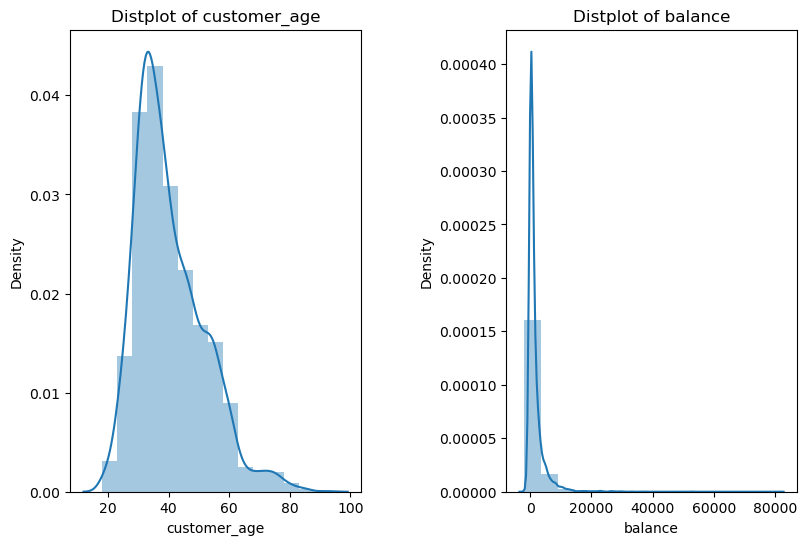

In [30]:
plt.figure(1 , figsize = (15 , 6))
n = 0 
for x in ['customer_age'  , 'balance']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sns.distplot(train_data[x] , bins = 15)
    plt.title('Distplot of {}'.format(x))
plt.show()

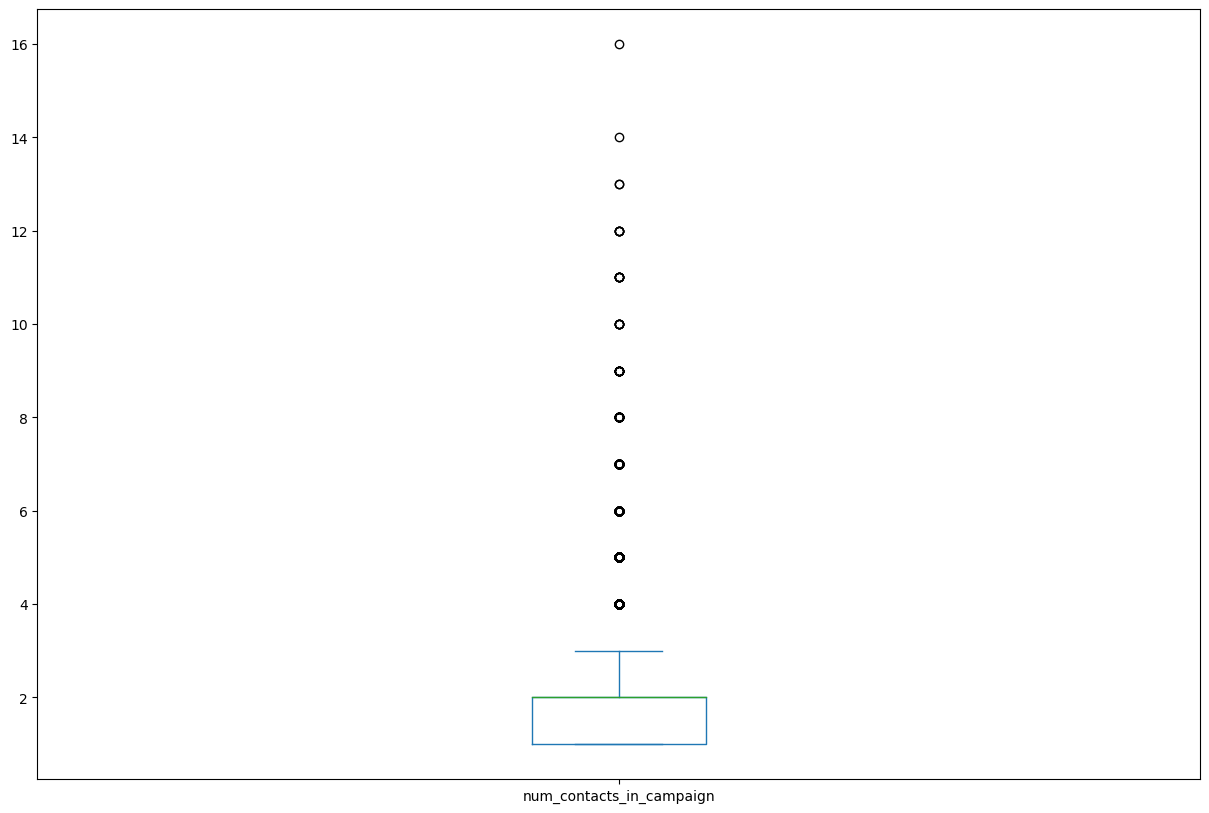

In [40]:
train_data['num_contacts_in_campaign'].plot(kind='box')
plt.show()

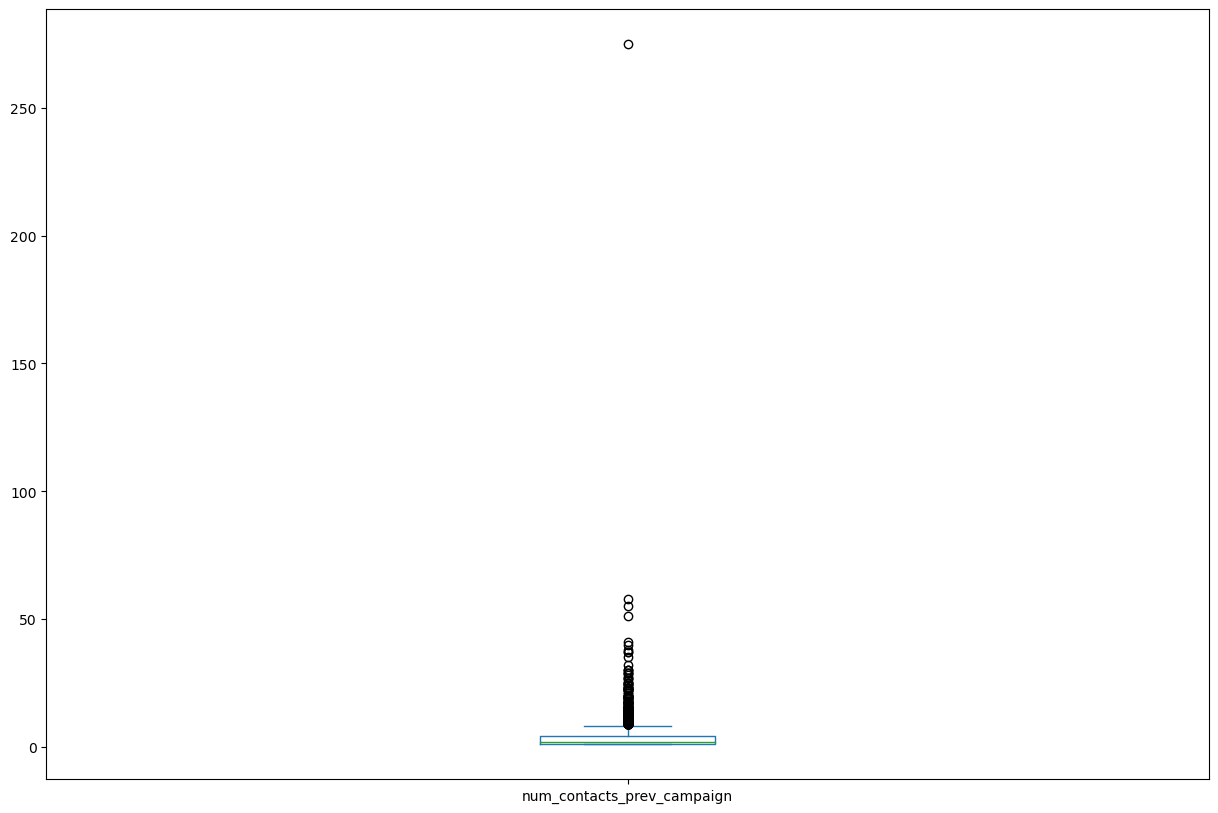

In [41]:
train_data['num_contacts_prev_campaign'].plot(kind='box')
plt.show()


In [43]:
train_data['SQRT_RATE'] = train_data['balance']**0.5

In [45]:
train_data['sqrt_rate'] = np.sqrt(train_data['balance'])

In [47]:
train_data.head()

,id,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,days_since_prev_campaign_contact,num_contacts_prev_campaign,prev_campaign_outcome,term_deposit_subscribed,SQRT_RATE,sqrt_rate
1,id_32289,34.0,blue-collar,married,secondary,no,934.0,no,yes,cellular,18,nov,143.0,2.0,132.0,1,other,0,30.561414,30.561414
10,id_2153,52.0,blue-collar,married,tertiary,no,1779.0,no,no,cellular,19,nov,1195.0,3.0,160.0,1,failure,0,42.178193,42.178193
13,id_43255,50.0,management,married,secondary,no,4873.0,no,no,telephone,6,feb,381.0,6.0,213.0,9,failure,0,69.806876,69.806876
15,id_12246,42.0,management,married,tertiary,no,55.0,yes,no,cellular,17,nov,57.0,1.0,126.0,3,failure,0,7.416198,7.416198
17,id_31616,41.0,technician,married,secondary,no,-3.0,yes,no,cellular,16,apr,138.0,1.0,300.0,1,failure,0,NaN,NaN


In [48]:
print("The skewness of the original data is {}".format(train_data.balance.skew()))
print('The skewness of the SQRT transformed data is {}'.format(train_data.SQRT_RATE.skew()))

print('')

print("The kurtosis of the original data is {}".format(train_data.balance.kurt()))
print("The kurtosis of the SQRT transformed data is {}".format(train_data.SQRT_RATE.kurt()))

The skewness of the original data is 7.644294111032762
The skewness of the SQRT transformed data is 1.8253243207106002

The kurtosis of the original data is 122.94145752229645
The kurtosis of the SQRT transformed data is 6.311013947846551


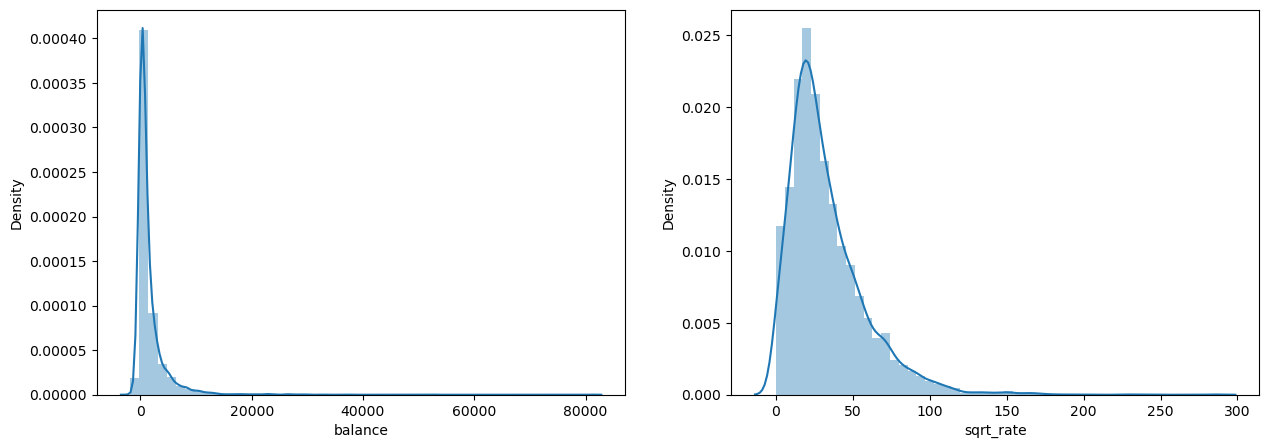

In [50]:
fig, axes = plt.subplots(1,2, figsize=(15,5))
sns.distplot(train_data['balance'], ax=axes[0])
sns.distplot(train_data['sqrt_rate'], ax=axes[1])

plt.show()

In [51]:
#Z-score of campaign

train_data['num_contacts_in_campaign'] = train_data['num_contacts_in_campaign'].astype('object')

train_data['last_contact_duration'] = train_data['last_contact_duration'].astype('category')

In [52]:

train_data['customer_age'] = pd.to_datetime(train_data['customer_age'], format = '%Y-%m-%d')
train_data['balance'] = pd.to_datetime(train_data['balance'], format = '%Y-%m-%d')

In [61]:
train_data.drop(columns = ['housing_loan'], inplace=True)
train_data.head()

,id,customer_age,job_type,marital,education,default,balance,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,days_since_prev_campaign_contact,num_contacts_prev_campaign,prev_campaign_outcome,term_deposit_subscribed,SQRT_RATE,sqrt_rate
1,id_32289,1970-01-01 00:00:00.000000034,blue-collar,married,secondary,no,1970-01-01 00:00:00.000000934,yes,cellular,18,nov,143.0,2.0,132.0,1,other,0,30.561414,30.561414
10,id_2153,1970-01-01 00:00:00.000000052,blue-collar,married,tertiary,no,1970-01-01 00:00:00.000001779,no,cellular,19,nov,1195.0,3.0,160.0,1,failure,0,42.178193,42.178193
13,id_43255,1970-01-01 00:00:00.000000050,management,married,secondary,no,1970-01-01 00:00:00.000004873,no,telephone,6,feb,381.0,6.0,213.0,9,failure,0,69.806876,69.806876
15,id_12246,1970-01-01 00:00:00.000000042,management,married,tertiary,no,1970-01-01 00:00:00.000000055,no,cellular,17,nov,57.0,1.0,126.0,3,failure,0,7.416198,7.416198
17,id_31616,1970-01-01 00:00:00.000000041,technician,married,secondary,no,1969-12-31 23:59:59.999999997,no,cellular,16,apr,138.0,1.0,300.0,1,failure,0,NaN,NaN


In [ ]:
#IQR

In [62]:
Q1 = train_data.balance.quantile(0.25)
Q2 = train_data.balance.quantile(0.50)
Q3 = train_data.balance.quantile(0.75)

# IQR : Inter-Quartile Range

IQR = Q3 - Q1

# Lower Limit:
LC = Q1 - (1.5*IQR)

# Upper Limit:
UC = Q3 + (1.5*IQR)

display(LC)
display(UC)

Timestamp('1969-12-31 23:59:59.999997814')

Timestamp('1970-01-01 00:00:00.000004078')

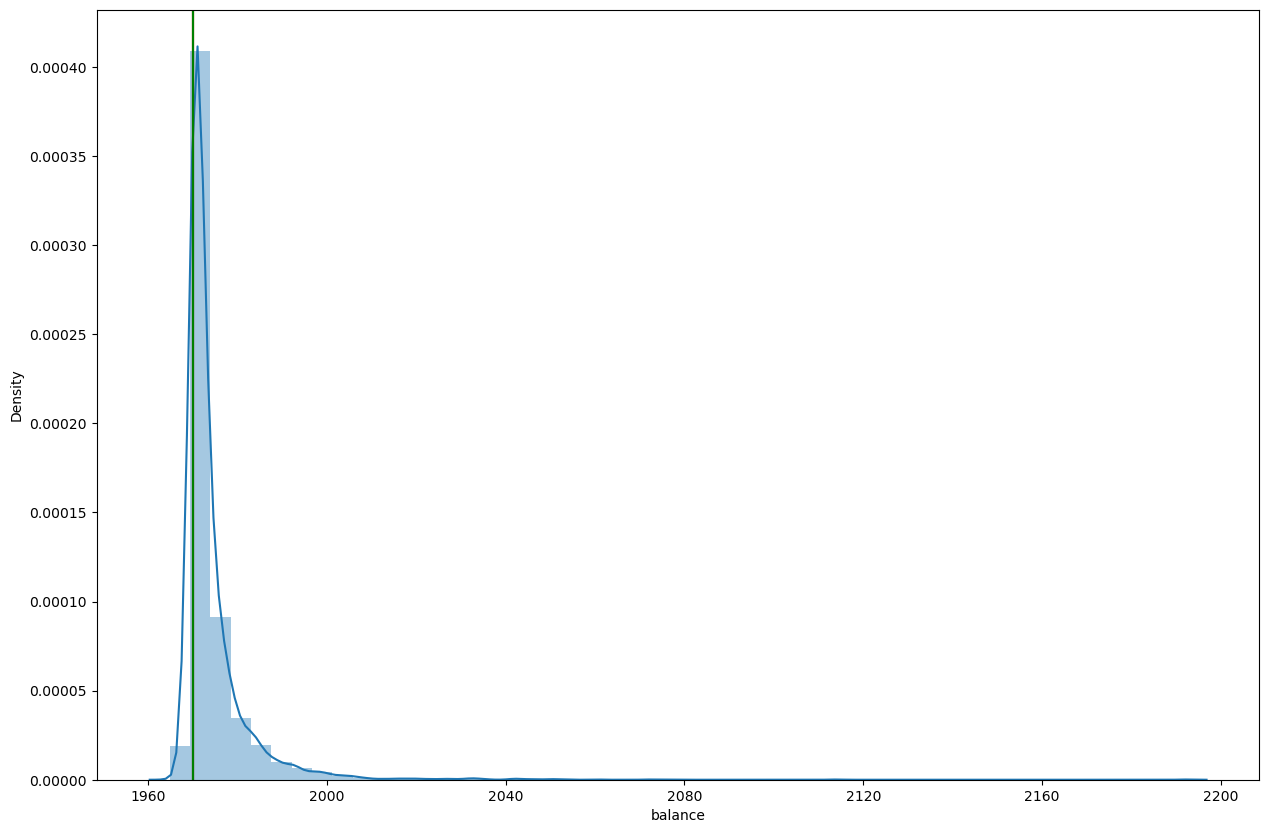

In [64]:
sns.distplot(train_data.balance)
plt.axvline(UC, color='r')
plt.axvline(LC, color ='r')
plt.axvline(Q1, color='g')
plt.axvline(Q3, color='g')
plt.show()

In [66]:
train_data[(train_data.balance<LC) | (train_data.balance>UC)].reset_index(drop=True)

,id,customer_age,job_type,marital,education,default,balance,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,days_since_prev_campaign_contact,num_contacts_prev_campaign,prev_campaign_outcome,term_deposit_subscribed,SQRT_RATE,sqrt_rate
0,id_43255,1970-01-01 00:00:00.000000050,management,married,secondary,no,1970-01-01 00:00:00.000004873,no,telephone,6,feb,381.0,6.0,213.0,9,failure,0,69.806876,69.806876
1,id_20274,1970-01-01 00:00:00.000000056,management,married,tertiary,no,1970-01-01 00:00:00.000004608,no,telephone,1,sep,208.0,2.0,189.0,2,failure,0,67.882251,67.882251
2,id_2017,1970-01-01 00:00:00.000000031,management,married,tertiary,no,1970-01-01 00:00:00.000005879,no,cellular,23,oct,450.0,1.0,430.0,2,failure,1,76.674637,76.674637
3,id_5003,1970-01-01 00:00:00.000000021,student,single,secondary,no,1970-01-01 00:00:00.000004127,no,cellular,5,apr,916.0,4.0,185.0,7,failure,1,64.241731,64.241731
4,id_20894,1970-01-01 00:00:00.000000060,management,divorced,tertiary,no,1970-01-01 00:00:00.000005697,no,cellular,30,apr,370.0,1.0,87.0,1,success,1,75.478474,75.478474
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
538,id_40601,1970-01-01 00:00:00.000000034,management,married,tertiary,no,1970-01-01 00:00:00.000006815,no,cellular,8,may,93.0,2.0,172.0,2,other,0,82.553013,82.553013
539,id_17238,1970-01-01 00:00:00.000000063,management,married,tertiary,no,1970-01-01 00:00:00.000005114,no,telephone,13,nov,2198.0,2.0,95.0,3,failure,1,71.512237,71.512237
540,id_38623,1970-01-01 00:00:00.000000038,management,married,tertiary,no,1970-01-01 00:00:00.000007780,no,telephone,4,may,361.0,1.0,355.0,1,other,0,88.204308,88.204308
541,id_35433,1970-01-01 00:00:00.000000025,admin.,single,secondary,no,1970-01-01 00:00:00.000004742,no,telephone,12,may,352.0,1.0,181.0,5,success,1,68.862181,68.862181


In [67]:
train_data[(train_data.balance<LC) | (train_data.balance>UC)].shape[0]

543

In [68]:
df = train_data[(train_data.balance>LC) & (train_data.balance<UC)]
df.head()

,id,customer_age,job_type,marital,education,default,balance,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,days_since_prev_campaign_contact,num_contacts_prev_campaign,prev_campaign_outcome,term_deposit_subscribed,SQRT_RATE,sqrt_rate
1,id_32289,1970-01-01 00:00:00.000000034,blue-collar,married,secondary,no,1970-01-01 00:00:00.000000934,yes,cellular,18,nov,143.0,2.0,132.0,1,other,0,30.561414,30.561414
10,id_2153,1970-01-01 00:00:00.000000052,blue-collar,married,tertiary,no,1970-01-01 00:00:00.000001779,no,cellular,19,nov,1195.0,3.0,160.0,1,failure,0,42.178193,42.178193
15,id_12246,1970-01-01 00:00:00.000000042,management,married,tertiary,no,1970-01-01 00:00:00.000000055,no,cellular,17,nov,57.0,1.0,126.0,3,failure,0,7.416198,7.416198
17,id_31616,1970-01-01 00:00:00.000000041,technician,married,secondary,no,1969-12-31 23:59:59.999999997,no,cellular,16,apr,138.0,1.0,300.0,1,failure,0,NaN,NaN
27,id_34844,1970-01-01 00:00:00.000000038,technician,divorced,secondary,no,1970-01-01 00:00:00.000000528,no,cellular,29,jan,212.0,3.0,226.0,7,failure,0,22.978251,22.978251


In [69]:
df.shape

(4952, 19)

In [70]:
train_data.shape

(5495, 19)

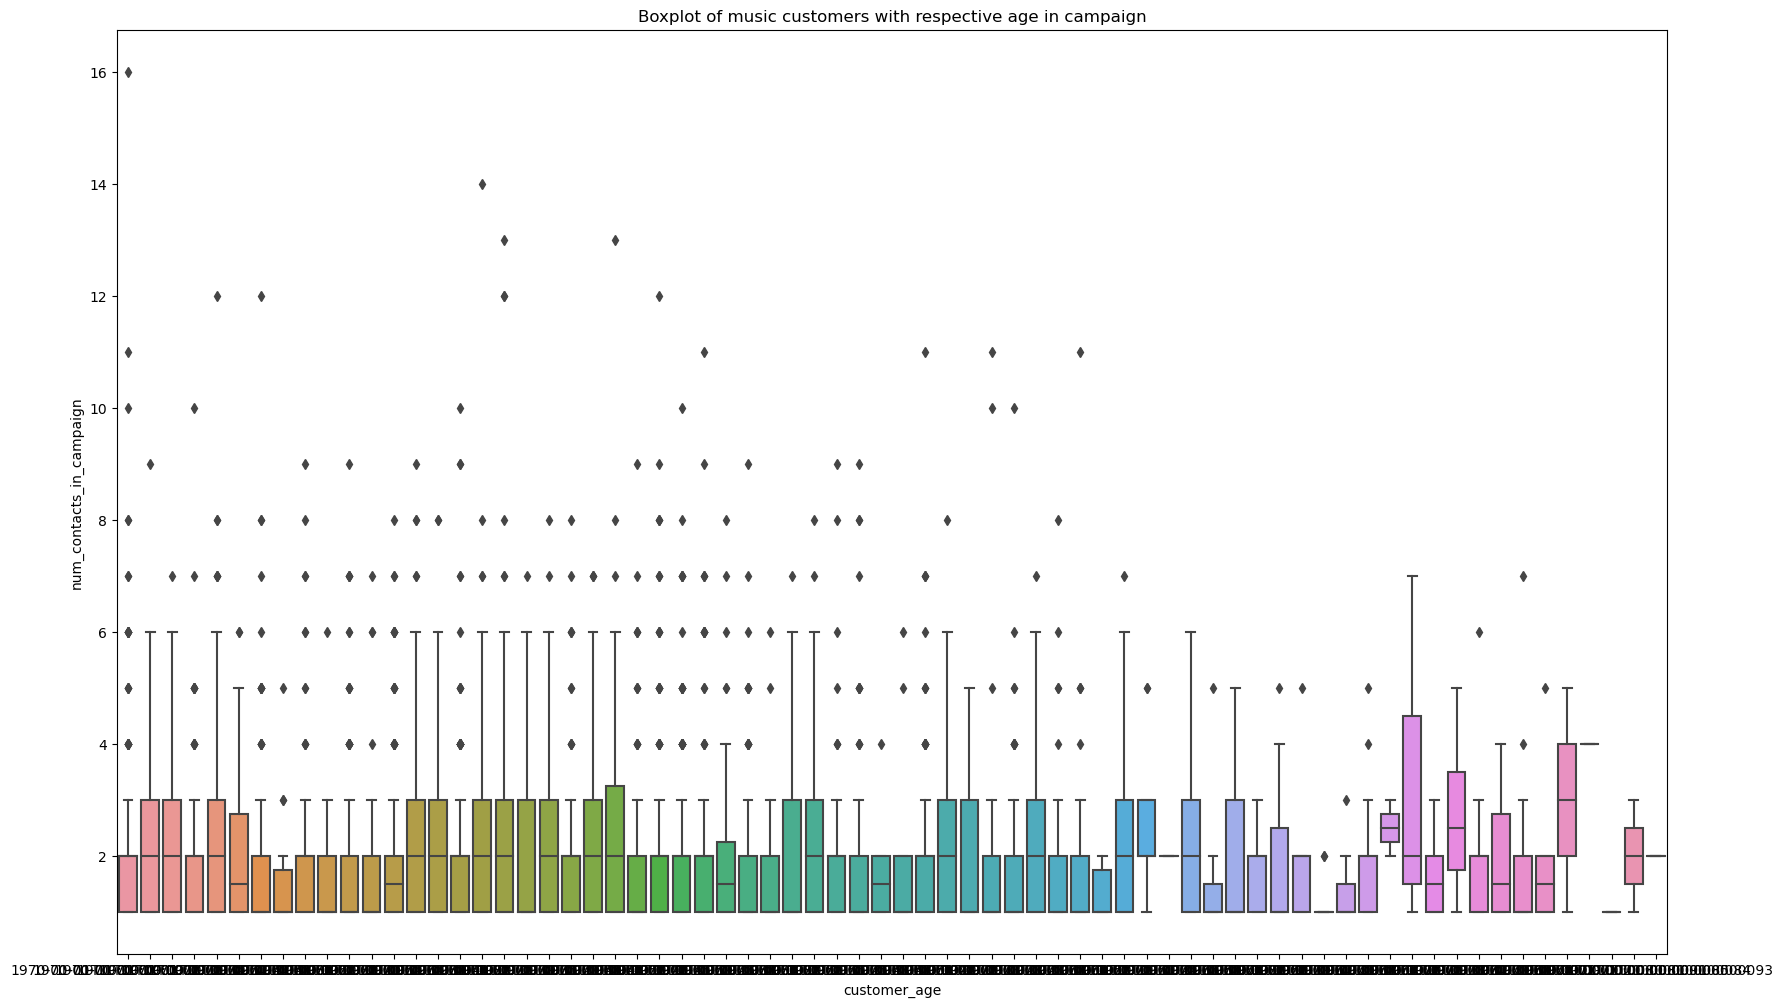

In [74]:
plt.figure(figsize=(20, 12))
sns.boxplot(x='customer_age', y='num_contacts_in_campaign', data=df)
plt.xlabel('customer_age')
plt.ylabel('num_contacts_in_campaign')
plt.title('Boxplot of music customers with respective age in campaign')
plt.show()

<AxesSubplot:xlabel='balance', ylabel='count'>

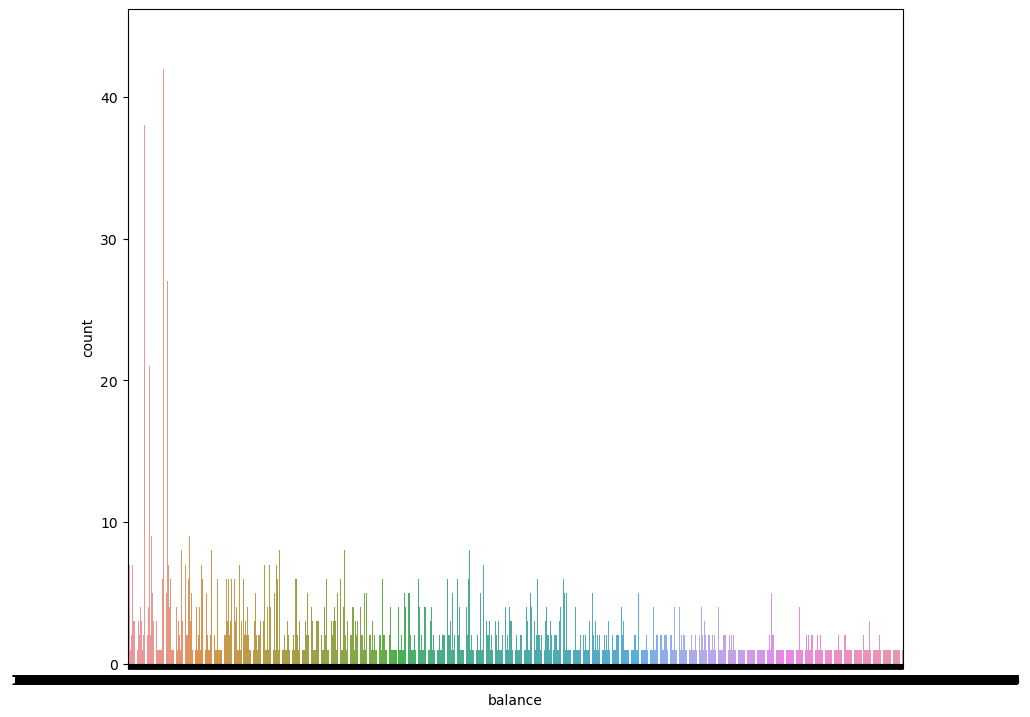

In [75]:
plt.figure(figsize=(10,8.5))
sns.countplot(df['balance'])

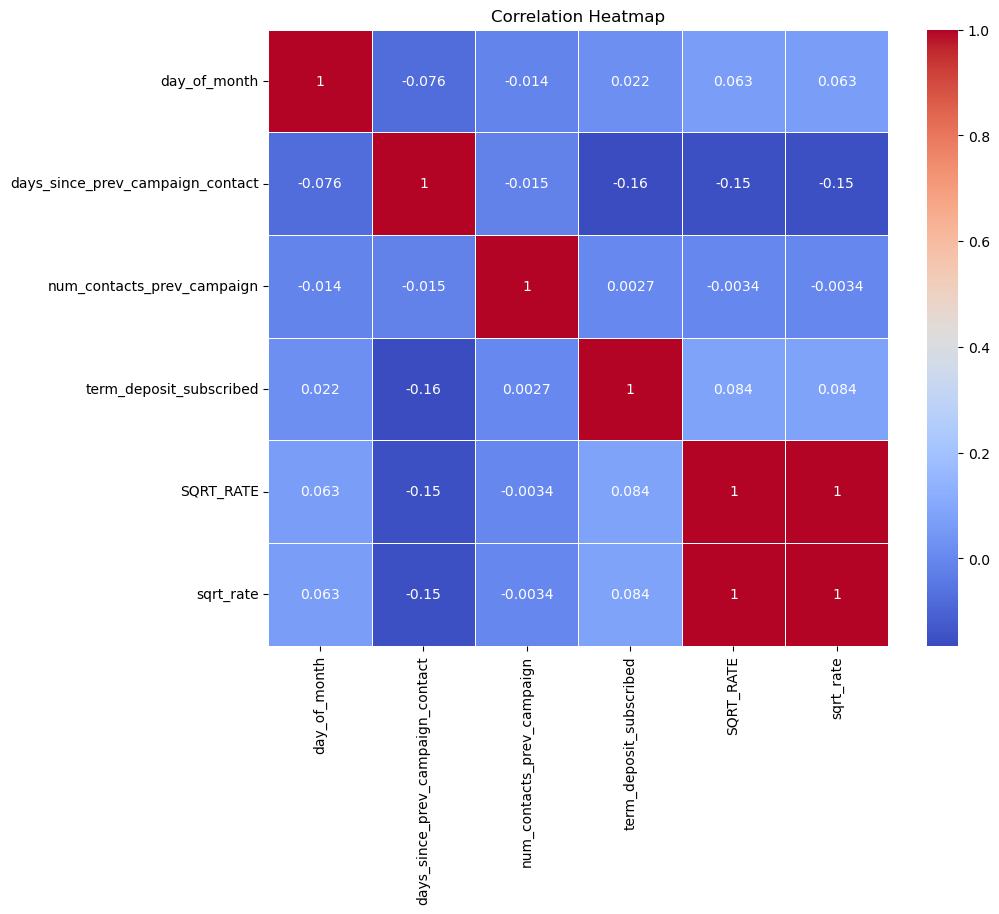

In [76]:
correlation_matrix = train_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [77]:
from sklearn.model_selection import train_test_split
import numpy as np
np.random.seed(0)
train_data, test_data = train_test_split(train_data, train_size = 0.7, test_size = 0.3, random_state = 100)

In [80]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
num_vars = ['customer_age','balance']
train_data[num_vars] = scaler.fit_transform(train_data[num_vars])

In [81]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [82]:
y_train = test_data[num_vars]
X_train = train_data[num_vars]

In [84]:
lm = LinearRegression()


In [87]:
lm.fit(X_train,X_train)


LinearRegression()

In [89]:
rfe = RFE(lm,step=10)
rfe = rfe.fit(X_train, X_train)

In [90]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('customer_age', True, 1), ('balance', False, 2)]

In [91]:
X_train.columns[rfe.support_]

Index(['customer_age'], dtype='object')

In [92]:
X_train_rfe = X_train[X_train.columns[rfe.support_]]
X_train_rfe.head()

,customer_age
15379,0.205479
16792,0.684932
6783,0.301370
25935,0.520548
27571,0.452055


In [93]:
y_train_rfe = y_train[y_train.columns[rfe.support_]]
y_train_rfe.head()

,customer_age
25907,1970-01-01 00:00:00.000000042
8124,1970-01-01 00:00:00.000000068
26357,1970-01-01 00:00:00.000000032
16423,1970-01-01 00:00:00.000000042
31464,1970-01-01 00:00:00.000000048


In [94]:
def build_model(X,y):
    X = sm.add_constant(X) 
    lm = sm.OLS(y,X).fit()
    print(lm.summary()) 
    return X
    
def checkVIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

In [96]:
X_train_new = build_model(X_train_rfe,X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:           customer_age   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.641e+33
Date:                Wed, 25 Oct 2023   Prob (F-statistic):               0.00
Time:                        22:18:10   Log-Likelihood:             1.3288e+05
No. Observations:                3846   AIC:                        -2.658e+05
Df Residuals:                    3844   BIC:                        -2.657e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         7.017e-17    8.5e-18      8.253   

In [97]:
checkVIF(X_train_new)

,Features,VIF
0,const,4.86
1,customer_age,1.00


Text(0.5, 0, 'Errors')

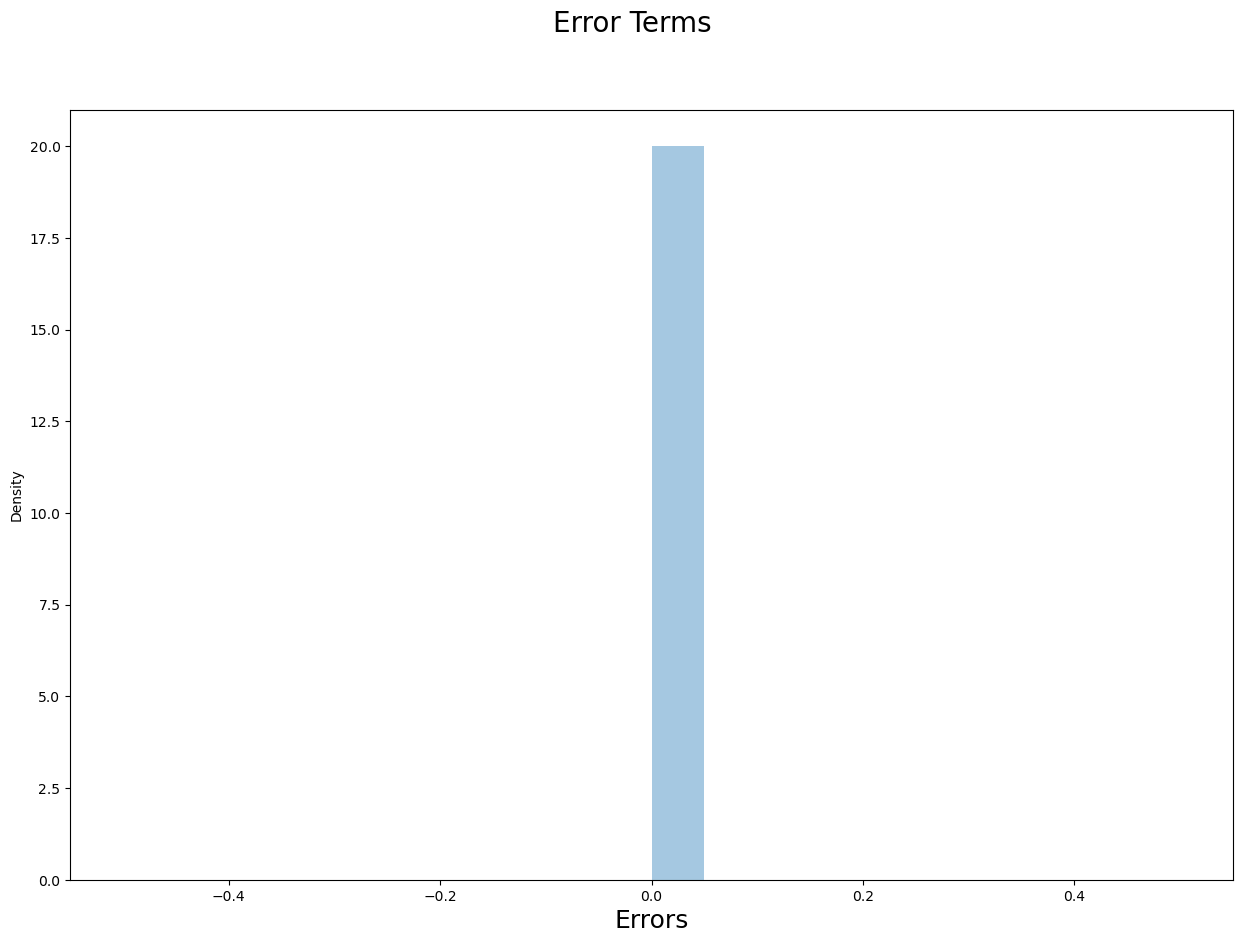

In [99]:
fig = plt.figure()
sns.distplot((X_train - X_train_rfe), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  
plt.xlabel('Errors', fontsize = 18)

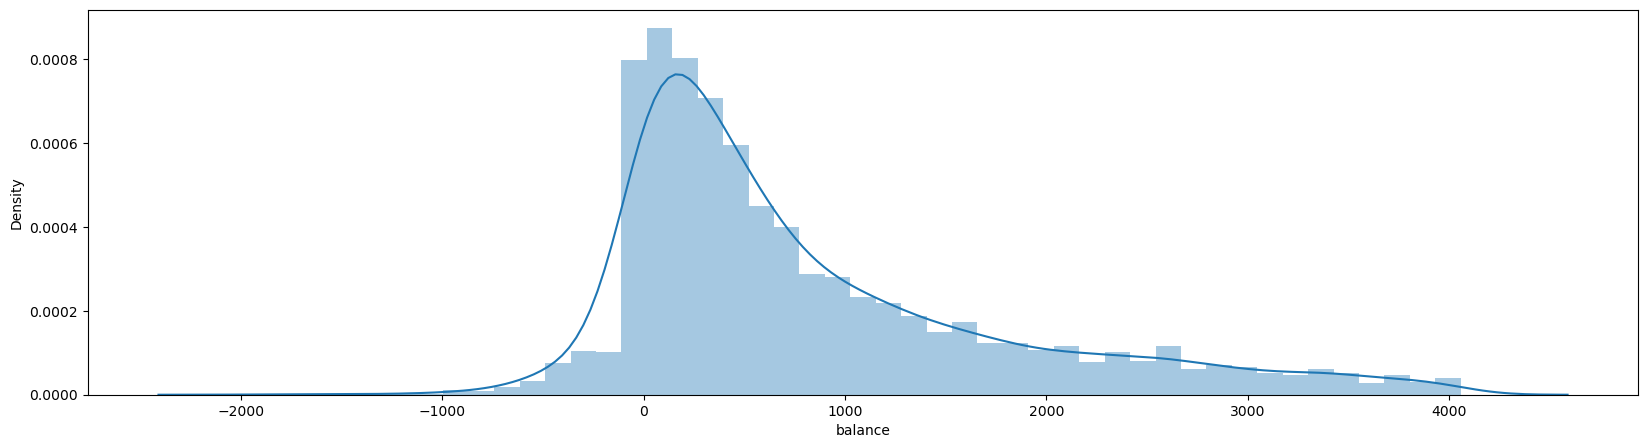

In [100]:
plt.figure(figsize=(20,5))
sns.distplot(df['balance'])
plt.show()

In [101]:
df_numeric = df.select_dtypes(include=['float', 'int'])
df_numeric.head()

,day_of_month,days_since_prev_campaign_contact,num_contacts_prev_campaign,term_deposit_subscribed,SQRT_RATE,sqrt_rate
1,18,132.0,1,0,30.561414,30.561414
10,19,160.0,1,0,42.178193,42.178193
15,17,126.0,3,0,7.416198,7.416198
17,16,300.0,1,0,NaN,NaN
27,29,226.0,7,0,22.978251,22.978251


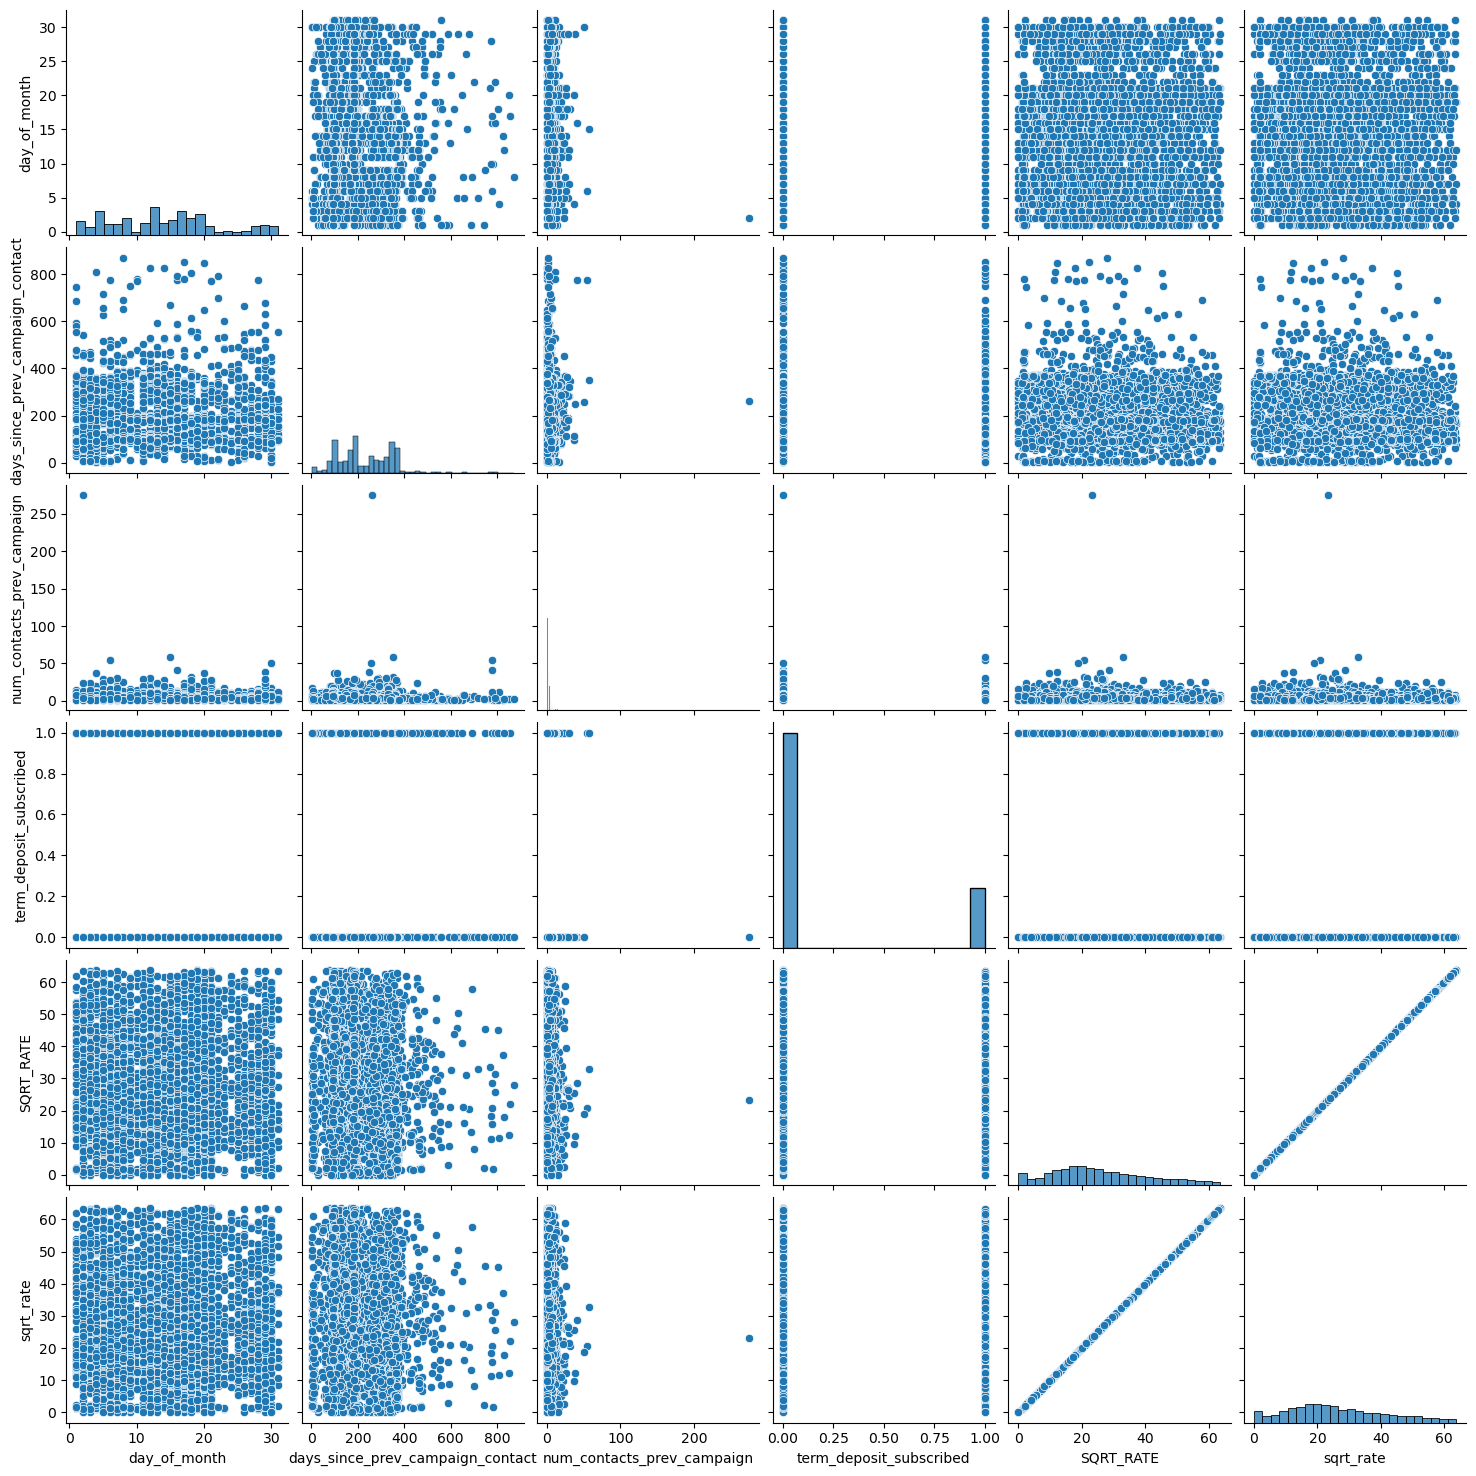

In [102]:
sns.pairplot(df_numeric)
plt.show()